In [14]:
%matplotlib inline
from typing import List, Tuple
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)

In [4]:
application_df = pd.read_csv('../data/org/application_train.csv')

In [5]:
categorical_cols = []

for col in application_df.columns:
    if application_df[col].dtypes == object:
        categorical_cols.append(col)
    if application_df[col].dtypes == int or application_df[col].dtypes == float:
        application_df[col] = application_df[col].fillna(application_df[col].mean())

In [6]:
application_df_dummy = pd.get_dummies(application_df, columns=categorical_cols)
application_df_dummy.head()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,...,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGA

In [7]:
def get_feature_importance(df, target_col, model):
    df_pos = df[df[target_col]==1].iloc[:20000,:]
    df_neg = df[df[target_col]==0].sample(frac=1).iloc[:20000,:]
    
    df_combined = pd.concat([df_pos, df_neg], axis=0)
    df_train, df_eval = train_test_split(df_combined, test_size=0.2, random_state=0)
    train_X, train_y = df_train.iloc[:,2:], df_train.iloc[:,1]
    eval_X, eval_y = df_eval.iloc[:,2:], df_eval.iloc[:,1]

    model.fit(train_X, train_y)
    pred_y = model.predict(eval_X)
    print('AUC: {}'.format(roc_auc_score(eval_y, pred_y)))
    
    col_names = train_X.columns
    importances = model.feature_importances_    
    plot_feature_importance(col_names, importances)
    
    f_importance_array = np.concatenate([np.array(col_names).reshape(-1,1),importances.reshape(-1,1)], axis=1)
    
    return pd.DataFrame(f_importance_array, columns=['col_name', 'importance'])
    
    
def plot_feature_importance(col_names, importances):
    indices = np.argsort(importances)
    plt.figure(figsize=(10,100))
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), col_names[indices])
    plt.show()

In [19]:
dt_model = DecisionTreeClassifier(max_depth=10)
rf_model = RandomForestClassifier(n_estimators=100)


EXT_SOURCEなる正体不明なカラムの影響度が大きい（ので除きたい）

AUC: 0.6437426437426437


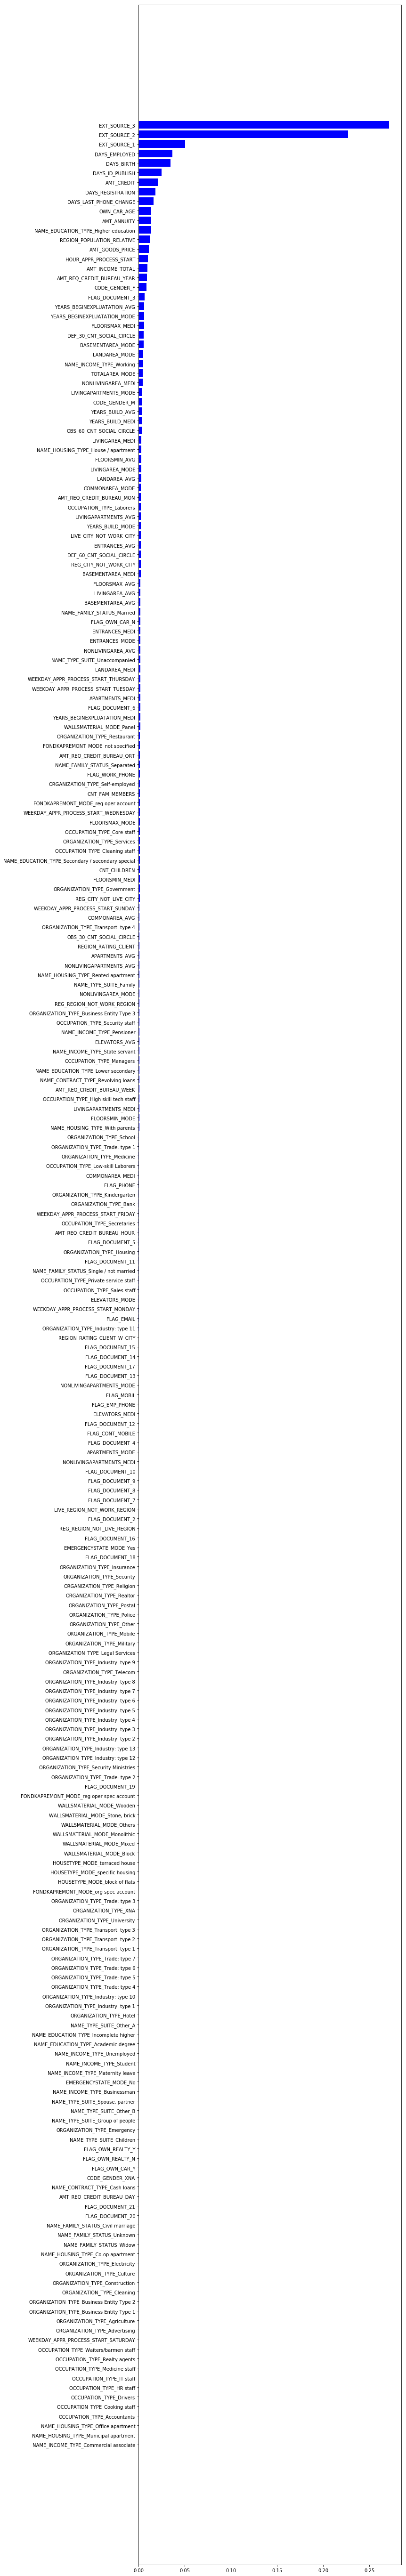

,col_name,importance
0,CNT_CHILDREN,0.00120124
1,AMT_INCOME_TOTAL,0.00955049
2,AMT_CREDIT,0.0215418
3,AMT_ANNUITY,0.0137201
4,AMT_GOODS_PRICE,0.011265
5,REGION_POPULATION_RELATIVE,0.012837
6,DAYS_BIRTH,0.0345234
7,DAYS_EMPLOYED,0.0365943
8,DAYS_REGISTRATION,0.0182731
9,DAYS_ID_PUBLISH,0.0248382


In [20]:
col_importances = get_feature_importance(df=application_df_dummy, target_col='TARGET', model=dt_model)
col_importances


In [21]:
application_df_dummy_replace = application_df_dummy.drop(columns=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'], axis=1)


AUC: 0.5977280977280977


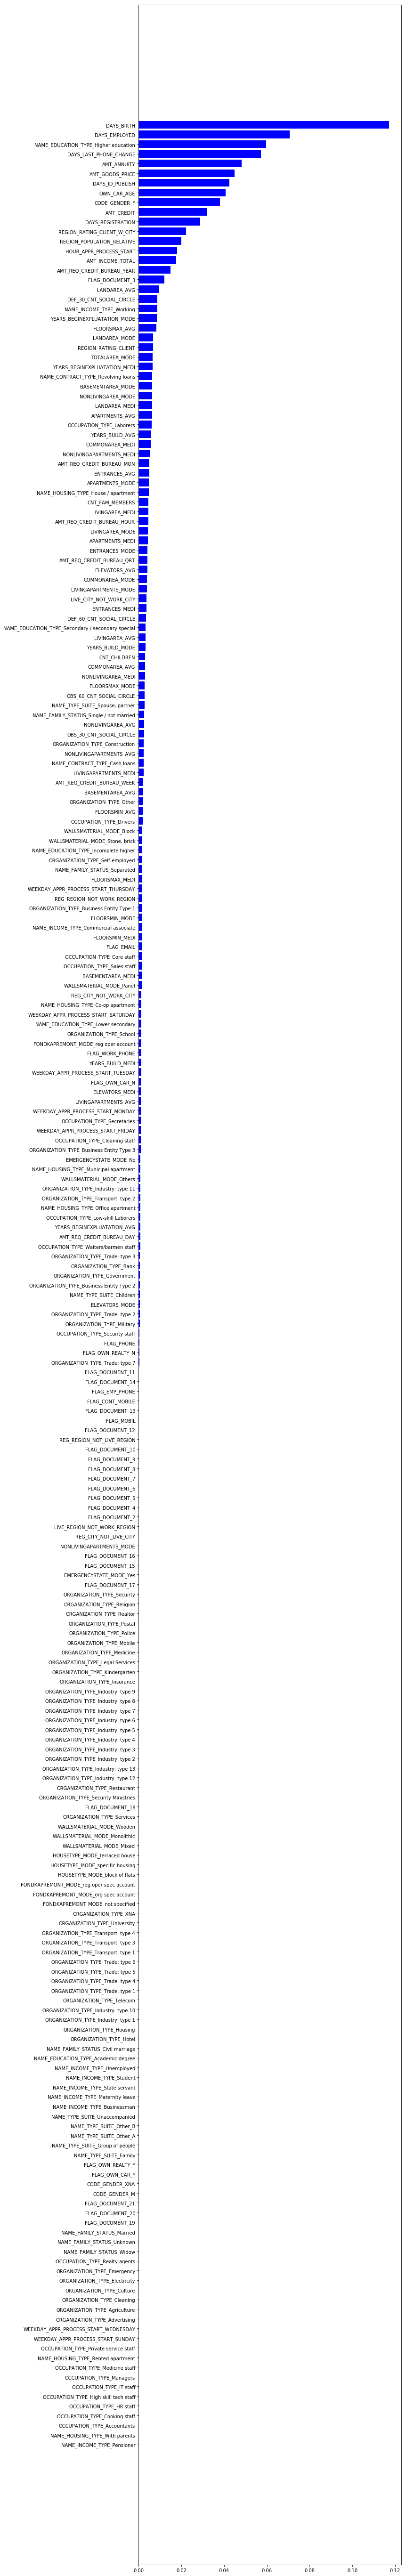

,col_name,importance
0,CNT_CHILDREN,0.00310893
1,AMT_INCOME_TOTAL,0.0176137
2,AMT_CREDIT,0.0318336
3,AMT_ANNUITY,0.0481924
4,AMT_GOODS_PRICE,0.0448656
5,REGION_POPULATION_RELATIVE,0.0200339
6,DAYS_BIRTH,0.117082
7,DAYS_EMPLOYED,0.0706654
8,DAYS_REGISTRATION,0.0287368
9,DAYS_ID_PUBLISH,0.0424144


In [24]:
col_importances = get_feature_importance(df=application_df_dummy_replace, target_col='TARGET', model=dt_model)
col_importances


AUC: 0.618030368030368


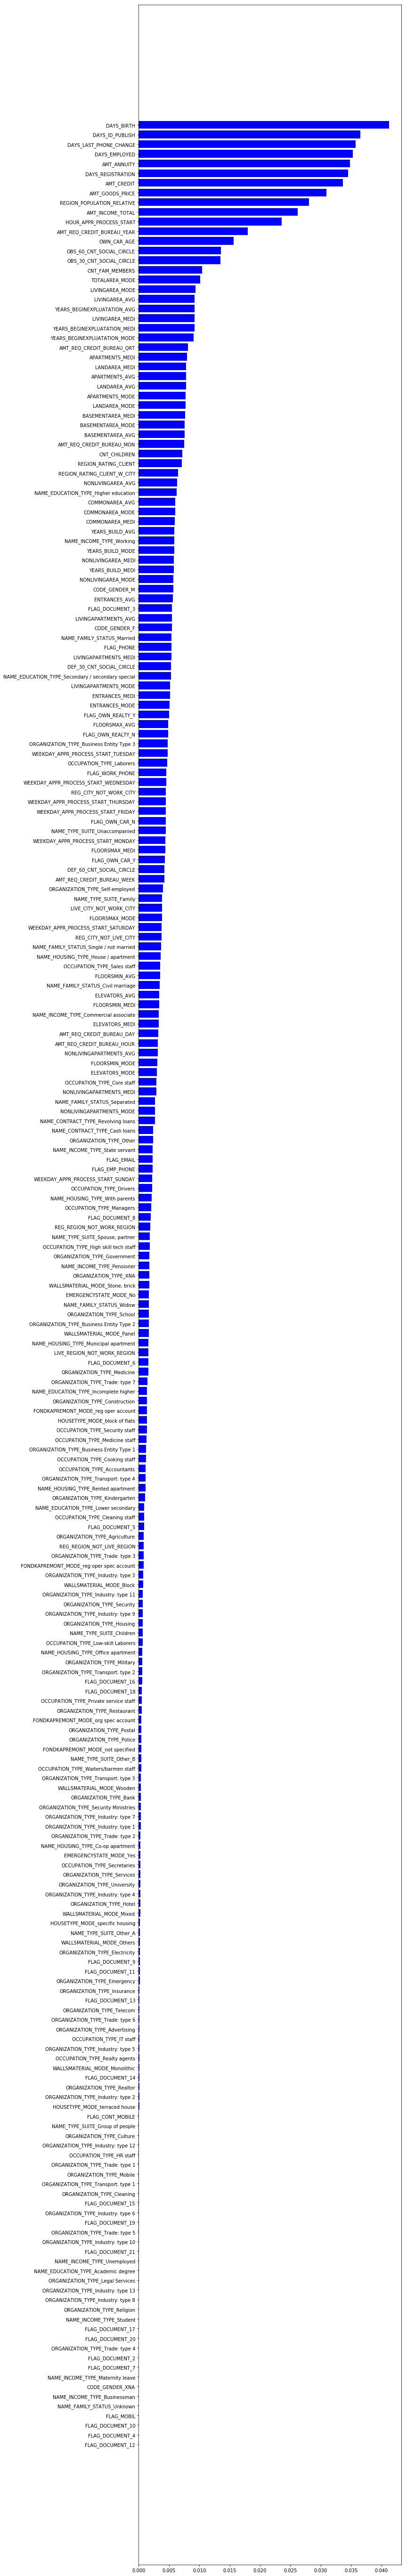

,col_name,importance
0,CNT_CHILDREN,0.00721641
1,AMT_INCOME_TOTAL,0.0261652
2,AMT_CREDIT,0.0336826
3,AMT_ANNUITY,0.0347855
4,AMT_GOODS_PRICE,0.0309094
5,REGION_POPULATION_RELATIVE,0.0280768
6,DAYS_BIRTH,0.0412238
7,DAYS_EMPLOYED,0.0352587
8,DAYS_REGISTRATION,0.0345362
9,DAYS_ID_PUBLISH,0.0365058


In [23]:
col_importances = get_feature_importance(df=application_df_dummy_replace, target_col='TARGET', model=rf_model)
col_importances


In [ ]:
importance_dict_dt = {}

for i in range(10):
    df_name = 'importance_' + str(i)
    col_importances = get_feature_importance(df=application_df_dummy, target_col='TARGET', model=dt_model)
    df_dict[df_name] = col_importances
    

In [ ]:
col_dict = {}

for feature in col_importances.col_name.unique():
    tmp_importance_list = []
    imp = col_importances[feature]
